<a href="https://colab.research.google.com/github/Harsharya3107/ML-algorithms-Practice/blob/main/ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Linear regressions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

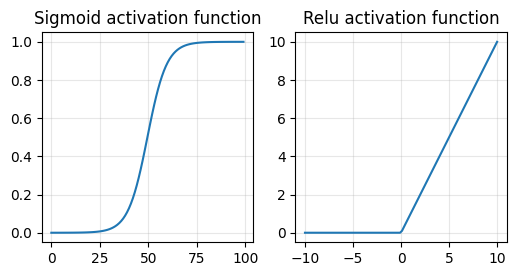

In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
plt.figure(figsize = (6, 6))

plt.subplot(2, 2, 1)
plt.plot(sigmoid(x))
plt.title("Sigmoid activation function")
plt.grid(alpha = 0.3)

plt.subplot(2, 2, 2)
plt.plot(x, relu(x))
plt.title("Relu activation function")
plt.grid(alpha = 0.3)



In [21]:
np.random.seed(10)
num_samples = 1000
X = np.random.rand(num_samples, 3) * np.array([24, 10, 60])
Y = np.random.rand(num_samples) * 100

In [22]:
pd.DataFrame(X, columns = ["hours_of_sleep", "cup_of_coffee", "travel_time"]).head(5)

,hours_of_sleep,cup_of_coffee,travel_time
0,18.511695,0.207519,38.018894
1,17.971293,4.985070,13.487799
2,4.753509,7.605307,10.146650
3,2.120156,6.853598,57.203601
4,0.094758,5.121923,48.757258


In [23]:
def create_custom_model():
  #input layer
  inputs = keras.Input(shape=(3, ))

  #hidden layer
  x = layers.Dense(2, activation='sigmoid')(inputs)

  #output layer
  outputs = layers.Dense(1, activation='linear')(x)

  model = keras.Model(inputs = inputs, outputs = outputs)
  return model

In [26]:
model = create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss = 'mean_squared_error')

In [28]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

None
